In [1]:
# use env weather (local)

In [2]:
import xarray as xr
import os
import numpy as np
import sys
import json
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
variable = "10m_u_component_of_wind"
timestp = "20240201-1307"
np_path   = "/mnt/V/Master/climate/skillscores/"+variable+"/"+timestp+"/"


In [78]:
max_fcn = []
max_sfno = []

In [91]:

for i in range(6,8755,6):
    fcn_step = fcn.sel(step=[i])['rmse'].squeeze()
    sfno_step = sfno.sel(step=[i])['rmse'].squeeze()
    print(i)
    max_fcn.append(np.float32(fcn_step.max()))
    max_sfno.append(np.float32(sfno_step.max()))

6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414
420
426
432
438
444
450
456
462
468
474
480
486
492
498
504
510
516
522
528
534
540
546
552
558
564
570
576
582
588
594
600
606
612
618
624
630
636
642
648
654
660
666
672
678
684
690
696
702
708
714
720
726
732
738
744
750
756
762
768
774
780
786
792
798
804
810
816
822
828
834
840
846
852
858
864
870
876
882
888
894
900
906
912
918
924
930
936
942
948
954
960
966
972
978
984
990
996
1002
1008
1014
1020
1026
1032
1038
1044
1050
1056
1062
1068
1074
1080
1086
1092
1098
1104
1110
1116
1122
1128
1134
1140
1146
1152
1158
1164
1170
1176
1182
1188
1194
1200
1206
1212
1218
1224
1230
1236
1242
1248
1254
1260
1266
1272
1278
1284
1290
1296
1302
1308
1314
1320
1326
1332
1338
1344
1350
1356
1362
1368
1374
1380
1386
1392
1398
1404
1410
1416
142

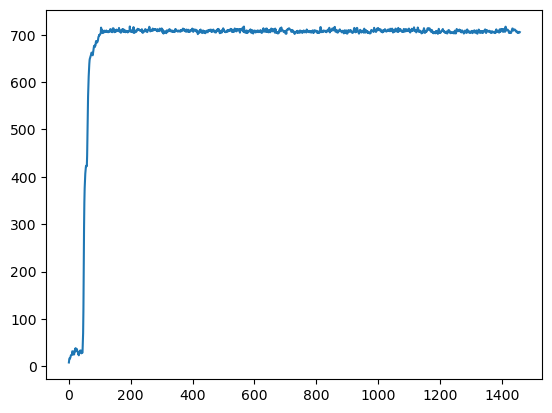

In [92]:
plt.plot(max_fcn)

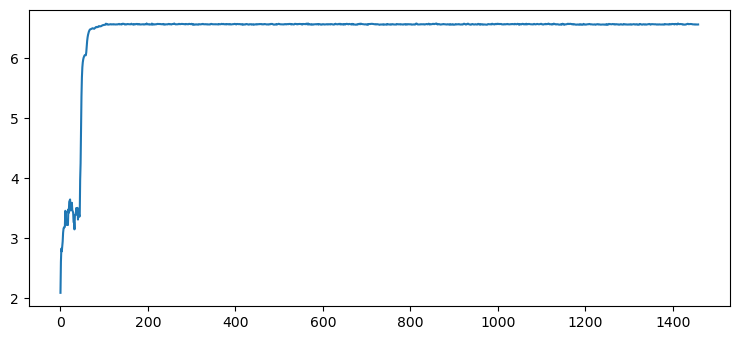

In [119]:
plt.plot(np.log(max_fcn))

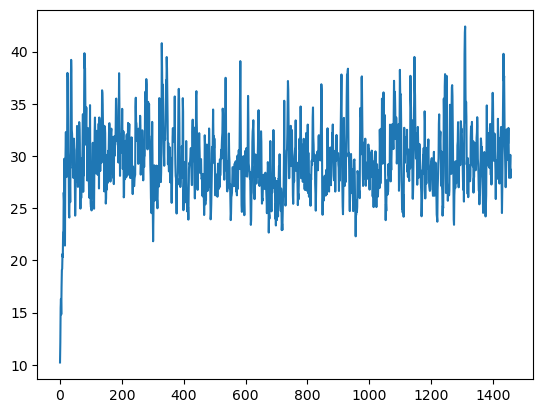

In [93]:
plt.plot(max_sfno)

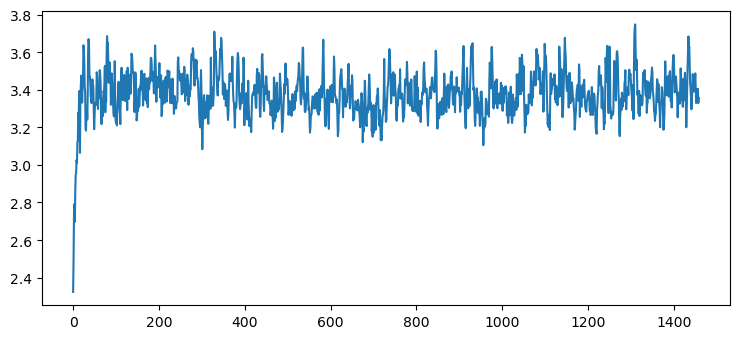

In [120]:
plt.plot(np.log(max_sfno))

In [60]:
sfno = xr.open_mfdataset(os.path.join(np_path,"sfno/rmse_global*"))

In [68]:
fcn = xr.open_mfdataset(os.path.join(np_path,"fourcastnet/rmse_global*"))

In [77]:
fcn_step = fcn.sel(step=[18])['rmse'].squeeze()

In [70]:
sfno_step = sfno.sel(step=[18])['rmse'].squeeze()

In [84]:
a = fcn.sel(step=[18])['rmse'].squeeze().max()

In [90]:
np.float32(a)

16.914469

In [101]:
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm

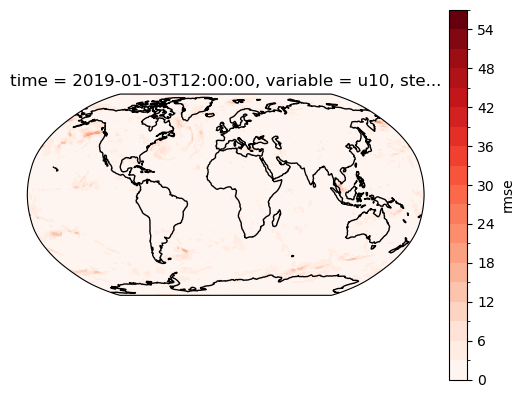

In [98]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
sfno_step = sfno.sel(step=[6*10])['rmse'].squeeze()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap="Reds",levels=list(range(0,60,3)), locator=ticker.LogLocator())
ax.coastlines()

In [127]:
np.arange(0,6,0.3).tolist()

[0.0,
 0.3,
 0.6,
 0.8999999999999999,
 1.2,
 1.5,
 1.7999999999999998,
 2.1,
 2.4,
 2.6999999999999997,
 3.0,
 3.3,
 3.5999999999999996,
 3.9,
 4.2,
 4.5,
 4.8,
 5.1,
 5.3999999999999995,
 5.7]

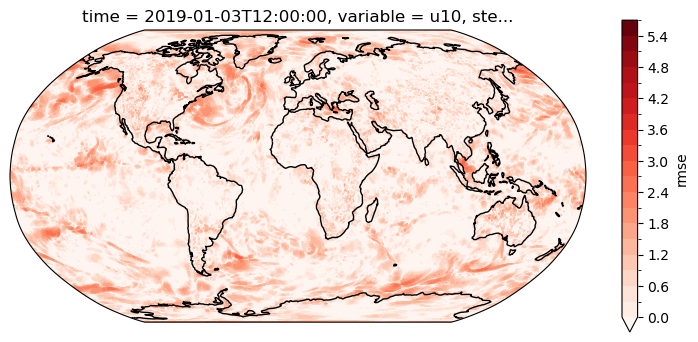

In [128]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
sfno_step = sfno.sel(step=[6*10])['rmse'].squeeze()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
np.log(sfno_step).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap="Reds",levels=np.arange(0,6,0.3))
ax.coastlines()

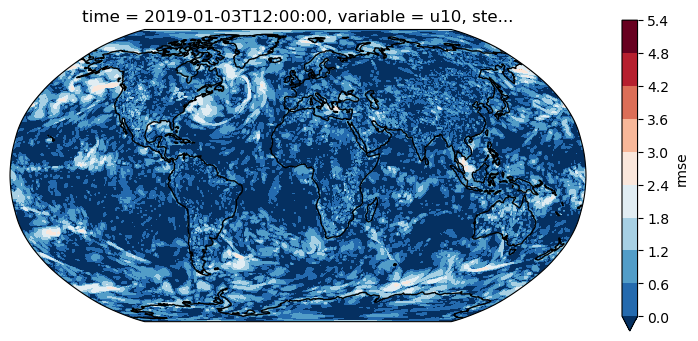

In [130]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
sfno_step = sfno.sel(step=[6*10])['rmse'].squeeze()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
np.log(sfno_step).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(0,6,0.6))
ax.coastlines()

In [ ]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'

sfno_step = sfno.sel(step=[6*10])['rmse'].squeeze()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
np.log(sfno_step).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(0,6,0.6))
ax.coastlines()

cbar = plt.colorbar()
ctks = [-4,-3,-2,-1,0,1,2,3,4]
ctkls = ["$-10^{%d}$"%(-v) for v in ctks[:4]] + ["$-1$~$1$"] + ["$10^{%d}$"%v for v in ctks[5:]]
cbar.set_ticks(ctks)
cbar.set_ticklabels(ctkls)

/home/lenny/miniconda3/envs/weather/lib/python3.12/site-packages/xarray/plot/utils.py:724: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  cbar = fig.colorbar(primitive, **cbar_kwargs)


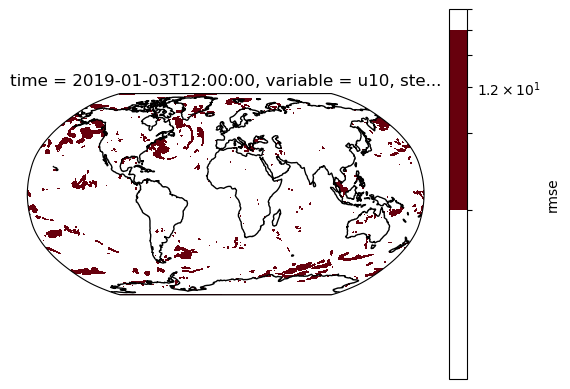

In [103]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
sfno_step = sfno.sel(step=[6*10])['rmse'].squeeze()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap="Reds",norm = LogNorm())
ax.coastlines()

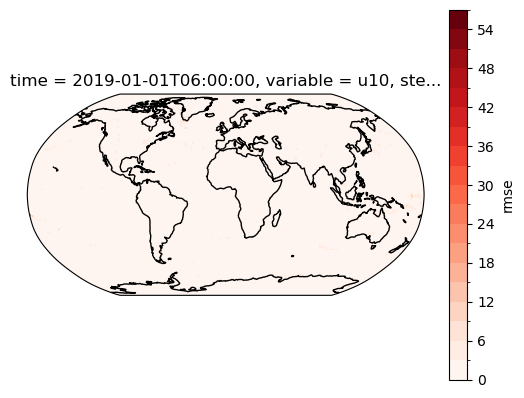

In [96]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
sfno_step = sfno.sel(step=[6*1])['rmse'].squeeze()

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap="Reds",levels=list(range(0,60,3)))
ax.coastlines()

In [117]:
np.log(sfno_step).to_numpy()

array([[-0.5163174 , -0.5163174 , -0.5163174 , ..., -0.5163174 ,
        -0.5163174 , -0.5163174 ],
       [ 0.88757384,  0.887318  ,  0.87949264, ...,  0.8934914 ,
         0.89265203,  0.88768315],
       [ 0.7632767 ,  0.7742969 ,  0.7644479 , ...,  0.7535133 ,
         0.7455292 ,  0.75011736],
       ...,
       [ 1.8696084 ,  1.8678143 ,  1.8636332 , ...,  1.8717028 ,
         1.8705211 ,  1.8695812 ],
       [ 2.0356274 ,  2.0334432 ,  2.0328176 , ...,  2.039408  ,
         2.0386894 ,  2.0370307 ],
       [ 2.0314324 ,  2.0314324 ,  2.0314324 , ...,  2.0314324 ,
         2.0314324 ,  2.0314324 ]], dtype=float32)

In [118]:
sfno_step.to_numpy()

array([[0.59671396, 0.59671396, 0.59671396, ..., 0.59671396, 0.59671396,
        0.59671396],
       [2.4292288 , 2.4286075 , 2.4096768 , ..., 2.4436464 , 2.4415963 ,
        2.4294944 ],
       [2.1452942 , 2.1690664 , 2.1478083 , ..., 2.1244507 , 2.1075563 ,
        2.1172485 ],
       ...,
       [6.485756  , 6.47413   , 6.447118  , ..., 6.4993544 , 6.491678  ,
        6.4855795 ],
       [7.657055  , 7.6403484 , 7.6355705 , ..., 7.686057  , 7.6805367 ,
        7.6678066 ],
       [7.625     , 7.625     , 7.625     , ..., 7.625     , 7.625     ,
        7.625     ]], dtype=float32)

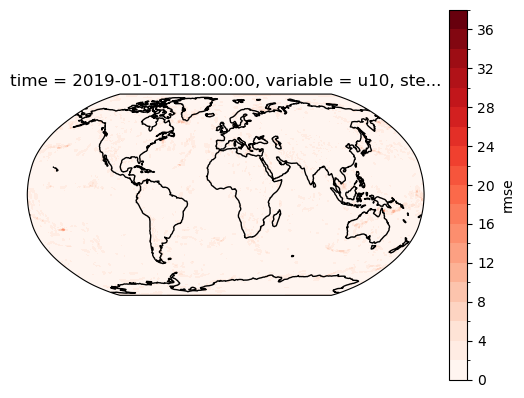

In [72]:
#Mollweide
# plt.rcParams['image.cmap'] = 'Reds'
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
fcn_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap="Reds",levels=list(range(0,40,2)))
ax.coastlines()

/tmp/ipykernel_35405/2896095311.py:23: UserWarning: The following kwargs were not used by contour: 'level'
  cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), level=list(range(0,200,20)), cmap=cm.PuBu_r)


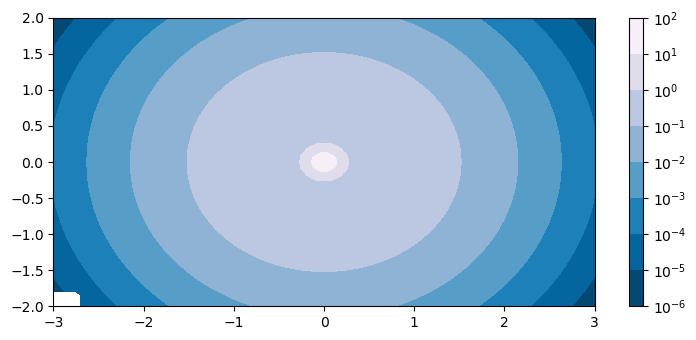

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)

z = Z1 + 50 * Z2
z[:5, :5] = -1
z = ma.masked_where(z <= 0, z)
fig, ax = plt.subplots()

cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), level=list(range(0,200,20)), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)

plt.show()

Text(0.5, 1.0, 'titel')

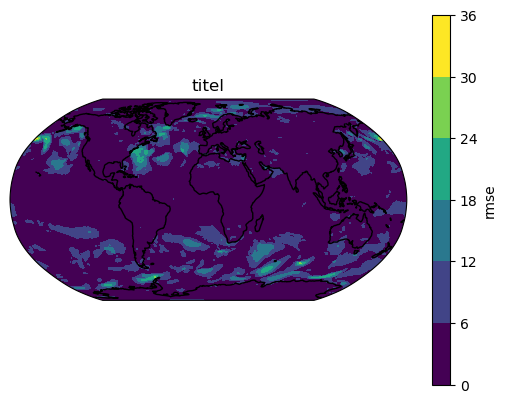

In [50]:
sfno_step = sfno.sel(step=[120+6*20])['rmse'].squeeze()

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title("titel")

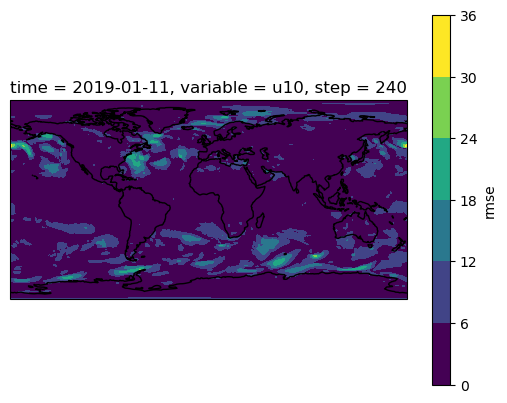

In [48]:
sfno_step = sfno.sel(step=[120+6*20])['rmse'].squeeze()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

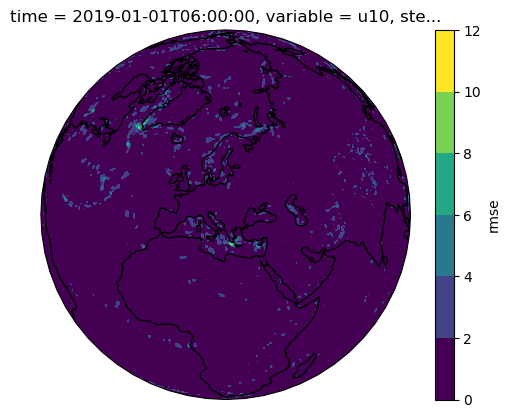

In [13]:
# Orthografic

ax = plt.axes(projection=ccrs.Orthographic(20, 45))
ax.set_global()
sfno_step.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


In [13]:
np_path   = "/mnt/V/Master/climate/skillscores/"+variable+"/"+timestp+"/"
rmse_sfno = np.load(np_path + "rmse_sfno_"+variable+"_"+timestp+"_fin.npy")
rmse_fcn  = np.load(np_path + "rmse_fcn_"+variable+"_"+timestp+"_fin.npy")
rmse_ref  = np.load(np_path + "rmse_ref_"+variable+"_"+timestp+"_fin.npy")

nans_sfno = np.load(np_path + "nans_sfno_"+variable+"_"+timestp+"_fin.npy")
nans_fcn  = np.load(np_path + "nans_fcn_"+variable+"_"+timestp+"_fin.npy")

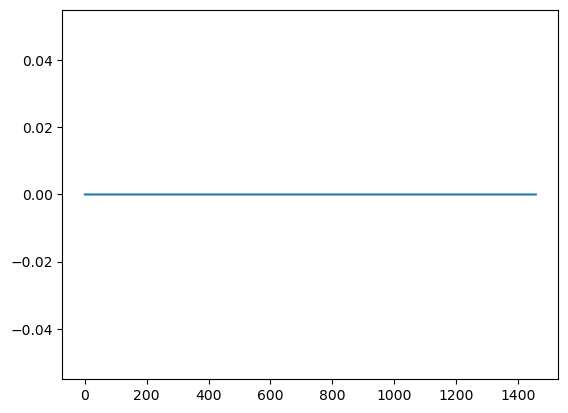

In [8]:
plt.plot(nans_sfno)

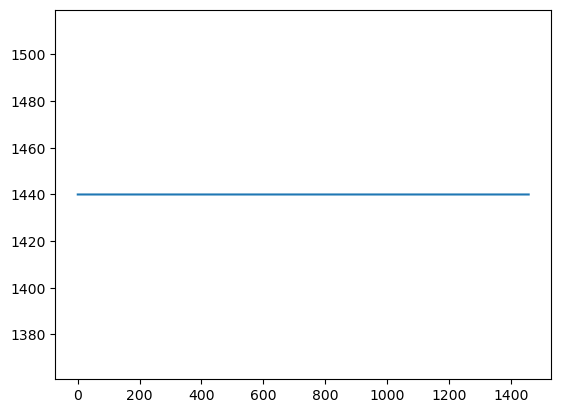

In [9]:
plt.plot(nans_fcn)

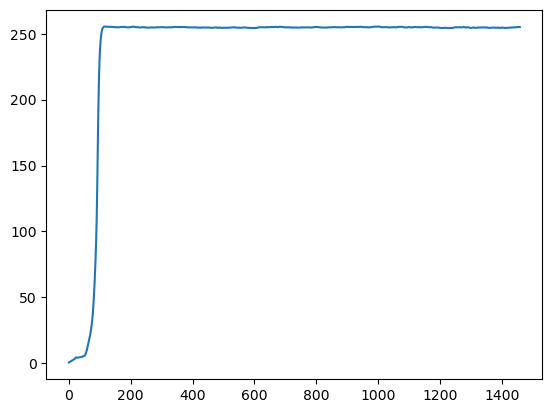

In [14]:
plt.plot(rmse_fcn)

(0.0, 100.0)

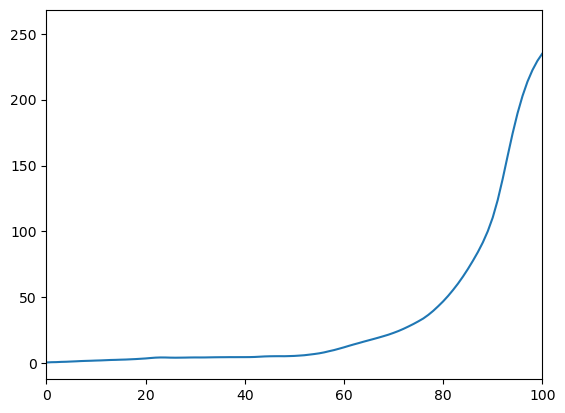

In [19]:
plt.plot(rmse_fcn)
plt.xlim(0,100)

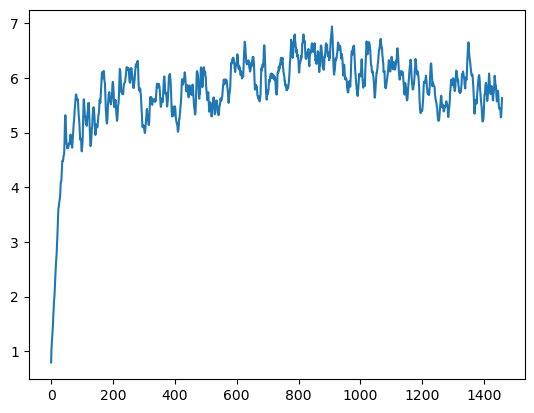

In [15]:
plt.plot(rmse_sfno)

(0.0, 100.0)

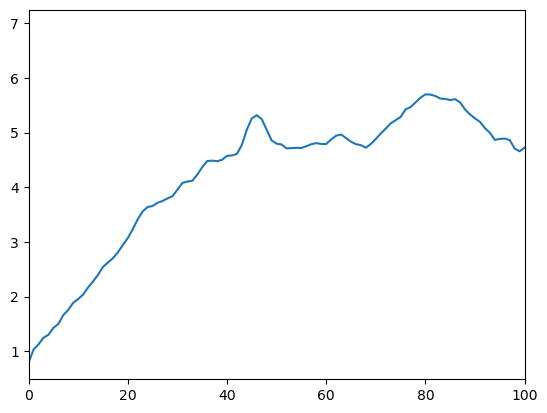

In [20]:
plt.plot(rmse_sfno)
plt.xlim(0,100)

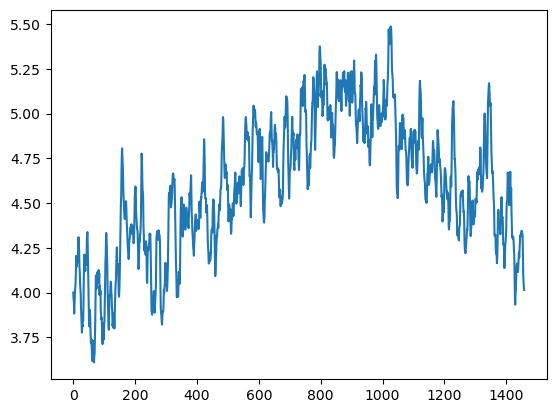

In [16]:
plt.plot(rmse_ref)

In [17]:
skill_fcn  = 1 - rmse_fcn /rmse_ref
skill_sfno = 1 - rmse_sfno/rmse_ref

In [24]:
zero_line = np.zeros(skill_fcn.shape)

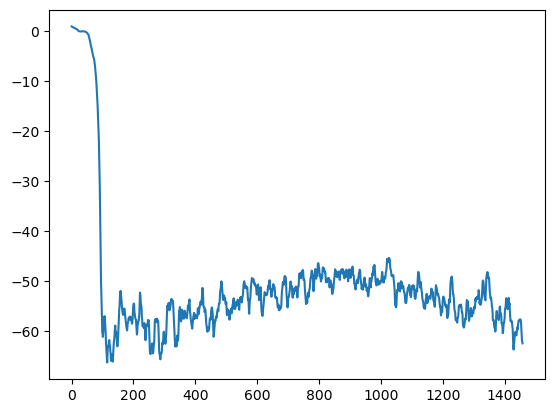

In [21]:
plt.plot(skill_fcn)

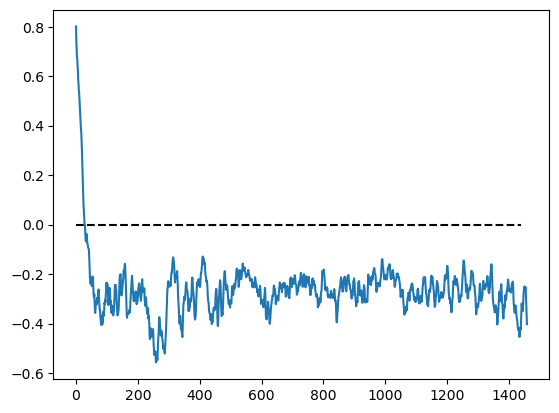

In [30]:
plt.plot(skill_sfno)
# plt.plot(skill_fcn,linestyles='-',color="b")
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")

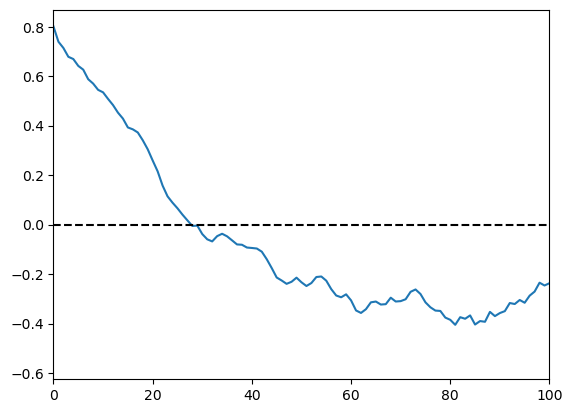

In [31]:
plt.plot(skill_sfno)
plt.xlim(0,100)
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")

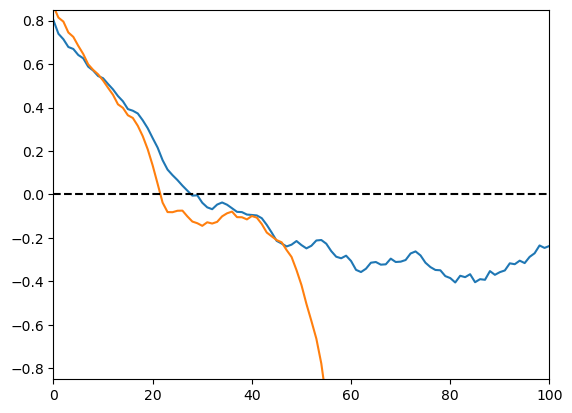

In [34]:
plt.plot(skill_sfno)
plt.plot(skill_fcn)
plt.xlim(0,100)
plt.ylim(-0.85,0.85)
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")